In [1]:
import keras
import tensorflow as tf

In [2]:
generator=keras.models.load_model('/content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /epoch 60/generator')

In [3]:
#Initialising Hyper Parameters

#Uncomment one of the two below lines. For some reason, on some computers the first one works, while on others the second.
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import adam
import tensorflow as tf

import numpy as np
import keras
#for consistency of random numbers and our images

noise_dim = 100  # input dimension of random vector - the vector that goes into the generator

batch_size = 64   #How many images do we want to include in each batch
steps_per_epoch = 2500  #How many steps do we want to take per iteration of our training set (number of batches)
epochs = 60      #How many iterations of our training set do we want to do.

#change the below values to the dimensions of your image. The channels number refers to the number of colors
img_rows, img_cols, channels = 128, 128, 4

#These are the recommended values for the optimizer
optimizer = Adam(0.0002, 0.5)

In [4]:
import matplotlib.pyplot as plt
def show_images(noise, size_fig):
    generated_images = generator.predict(noise)   #Create the images from the GAN.
    
    generated_images=np.argmax(generated_images,axis=3)
    
    plt.figure(figsize=size_fig)
    
    for i, image in enumerate(generated_images):
        plt.subplot(size_fig[0], size_fig[1], i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)))    #If the image is grayscale, as in our case, then we will reshape the output in the following way.
                                                                            #Also, we set the coloring to grayscale so that it doesn't look like it came out of an infrared camera :)
        else:
            plt.imshow(image.reshape((img_rows, img_cols)))
        plt.axis('off')
    
    plt.tight_layout()   #Tight layout so that all of the generated images form a nice grid
    plt.show()
    return 

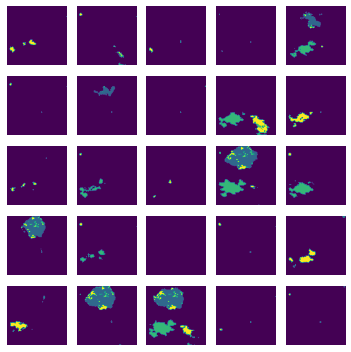

In [5]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
show_images(noise, (5, 5))


In [6]:
noise.shape

(25, 100)

In [7]:
generated_images = generator.predict(noise)   #Create the images from the GAN.
    
generated_images=np.argmax(generated_images,axis=3)

In [8]:
generated_images.shape

(25, 128, 128)

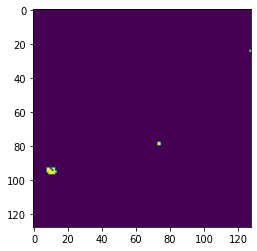

In [9]:
plt.imshow(generated_images[23])

In [11]:
to_save=generated_images[0:9]
to_save.shape

(9, 128, 128)

In [ ]:
generated_images.

In [12]:
c_gan_generator=keras.models.load_model('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Models/Models/C_Gans_Generator/CGAN_model_generator.h5')

In [14]:
argmaxed=tf.keras.utils.to_categorical(to_save)
argmaxed.shape

(9, 128, 128, 4)

In [15]:
mri_pred=c_gan_generator.predict(argmaxed)
mri_pred.shape

(9, 128, 128, 1)

In [ ]:
def show_images(batch_i):
        
        r, c = 3, 3

        batch_i = 3

        rand_ = random.randint(0,(len(x_val)-batch_i))

        imgs_B, imgs_A = x_val[rand_:rand_+batch_i,:,:,:], y_val[rand_:rand_+batch_i,:,:,:]
        fake_A = generator.predict(imgs_B)
        x_ = np.argmax(imgs_B, axis = 3)
        x = x_[:,:,:]
        y = fake_A[:,:,:,0]
        z = imgs_A[:,:,:,0]
        
        gen_imgs = np.concatenate([x, y, z])

        # Rescale images 0 - 1
        #gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Input', 'Output', 'Ground Truth']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        plt.figure(figsize=(12, 8))
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[i])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()

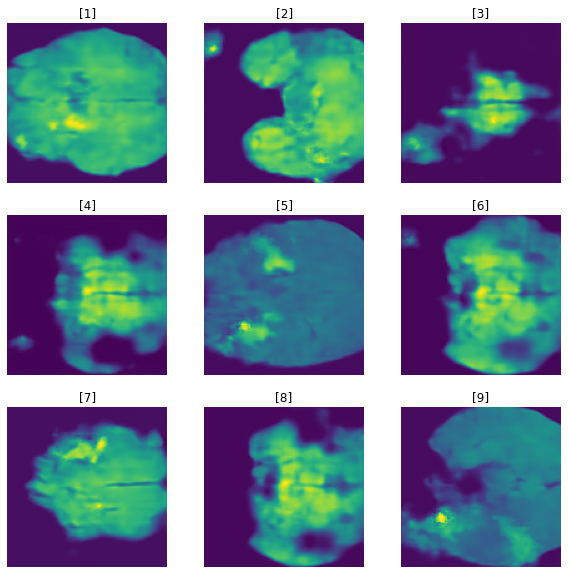

In [41]:

fig, axs = plt.subplots(r, c)

cnt = 0
title_count=1
r, c = 3, 3

for i in range(r):
  for j in range(c):
    axs[i,j].imshow(mri_pred[cnt,:,:,0])
    plt.gcf().set_size_inches(10, 10)
    axs[i, j].set_title([title_count])
    axs[i,j].axis('off')
    cnt += 1
    title_count=title_count+1
plt.show()
#plt.close()

**end of the session**

In [ ]:
im_list=[]
counter=0
for i in range(320):
  noise = np.random.normal(0, 1, size=(25, noise_dim))
  generated_images = generator.predict(noise)   #Create the images from the GAN.
 
  for j in range(generated_images.shape[0]):
    a=generated_images[j]
    im_list.append(a)
    
  counter=counter+1
  print(counter)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
img_arr=np.asarray(im_list)
img_arr.shape

(8000, 128, 128, 4)

In [ ]:
np.unique(img_arr)

array([-0.9975924 , -0.9975433 , -0.9968926 , ...,  0.9999999 ,
        0.99999994,  1.        ], dtype=float32)

In [ ]:
del im_list

In [ ]:
argmaxed=np.argmax(img_arr,axis=3)

In [ ]:
np.unique(argmaxed) 

array([0, 1, 2, 3])

In [ ]:
argmaxed=tf.keras.utils.to_categorical(argmaxed)
argmaxed.shape

(8000, 128, 128, 4)

In [ ]:
np.unique(argmaxed)

array([0., 1.], dtype=float32)

In [ ]:
path='/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/8000 generated/'

In [ ]:
np.save(path+'masks',argmaxed)

**LETS GENERATE THE mri FOR THESE MASKS**

In [ ]:
c_gan_generator=keras.models.load_model('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Models/Models/C_Gans_Generator/CGAN_model_generator.h5')

In [ ]:
mri_pred=c_gan_generator.predict(argmaxed)
mri_pred.shape

(8000, 128, 128, 1)

In [ ]:
maxi=np.argmax(argmaxed,axis=3)

In [ ]:
maxi.shape

(8000, 128, 128)

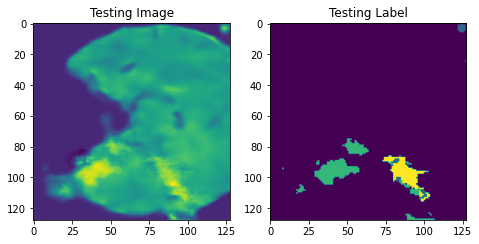

In [ ]:
import random
image = random.randint(0,8000)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(mri_pred[image,:,:,0])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(maxi[image])

plt.show()


In [ ]:
np.min(mri_pred)

-0.4685173

In [ ]:
b = (mri_pred - np.min(mri_pred))/np.ptp(mri_pred)
np.min(b)

0.0

In [ ]:
np.max(b)

1.0

In [ ]:
np.save(path+'MRI',b)